In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
df = pd.read_csv("../data/raw/BaseCLD2026.csv", sep=";", encoding="utf-8")

df.shape

(31126, 22)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31126 entries, 0 to 31125
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     31126 non-null  int64  
 1   ANNEE                  31126 non-null  int64  
 2   COMMU_LAB              30828 non-null  object 
 3   RAIN                   31126 non-null  object 
 4   Sol_simple             31052 non-null  object 
 5   type_sol               28517 non-null  object 
 6   Date_prelevement       31126 non-null  object 
 7   Date_enregistrement    31126 non-null  object 
 8   Date_analyse           31126 non-null  object 
 9   Operateur_chld         31126 non-null  object 
 10  Taux_Chlordecone       31126 non-null  float64
 11  Operateur_5b           31126 non-null  object 
 12  Taux_5b_hydro          31114 non-null  object 
 13  histoBanane_Histo_ban  13143 non-null  float64
 14  mnt_tpi_mean           31098 non-null  float64
 15  mn

In [132]:
df.head()

,ID,ANNEE,COMMU_LAB,RAIN,Sol_simple,type_sol,Date_prelevement,Date_enregistrement,Date_analyse,Operateur_chld,...,Taux_5b_hydro,histoBanane_Histo_ban,mnt_tpi_mean,mnt_tri_mean,mnt_rugosite_mean,mnt_ombrage_mean,mnt_exposition_mean,mnt_pente_mean,X,Y
0,20143,2010,GROS-MORNE,2000-3000,Andosol,Intergrades Sols … allophane relativement ‚vol...,24/05/2007,24/05/2007,24/05/2007,=,...,"0,07",2.0,5.805967,8.033367,21.593658,131.173998,79.447954,39.043098,714300.831892,1.626344e+06
1,20143,2010,GROS-MORNE,2000-3000,Andosol,Intergrades Sols … allophane relativement ‚vol...,24/05/2007,24/05/2007,24/05/2007,=,...,"0,07",2.0,5.683589,7.920563,20.944901,134.608205,76.985690,38.123675,714303.743345,1.626354e+06
2,20143,2010,GROS-MORNE,2000-3000,Andosol,Intergrades Sols … allophane relativement ‚vol...,24/05/2007,24/05/2007,24/05/2007,=,...,"0,07",3.0,2.239457,7.108432,20.085883,139.420523,76.064719,34.976678,714309.446765,1.626360e+06
3,20143,2010,GROS-MORNE,2000-3000,Andosol,Intergrades Sols … allophane relativement ‚vol...,24/05/2007,24/05/2007,24/05/2007,=,...,"0,07",1.0,4.038373,7.530090,23.427731,121.603678,92.392454,38.315796,714294.208512,1.626321e+06
4,20143,2010,GROS-MORNE,2000-3000,Andosol,Intergrades Sols … allophane relativement ‚vol...,24/05/2007,24/05/2007,24/05/2007,=,...,"0,07",2.0,0.596502,6.637082,20.153770,134.065066,83.930611,33.877727,714303.823058,1.626341e+06


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31126 entries, 0 to 31125
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     31126 non-null  int64  
 1   ANNEE                  31126 non-null  int64  
 2   COMMU_LAB              30828 non-null  object 
 3   RAIN                   31126 non-null  object 
 4   Sol_simple             31052 non-null  object 
 5   type_sol               28517 non-null  object 
 6   Date_prelevement       31126 non-null  object 
 7   Date_enregistrement    31126 non-null  object 
 8   Date_analyse           31126 non-null  object 
 9   Operateur_chld         31126 non-null  object 
 10  Taux_Chlordecone       31126 non-null  float64
 11  Operateur_5b           31126 non-null  object 
 12  Taux_5b_hydro          31114 non-null  object 
 13  histoBanane_Histo_ban  13143 non-null  float64
 14  mnt_tpi_mean           31098 non-null  float64
 15  mn

In [134]:
df.isna().sum().sort_values(ascending=False)

histoBanane_Histo_ban    17983
type_sol                  2609
COMMU_LAB                  298
Sol_simple                  74
mnt_pente_mean              28
mnt_exposition_mean         28
mnt_ombrage_mean            28
mnt_rugosite_mean           28
mnt_tri_mean                28
mnt_tpi_mean                28
Taux_5b_hydro               12
ID                           0
X                            0
Operateur_5b                 0
ANNEE                        0
Taux_Chlordecone             0
Operateur_chld               0
Date_analyse                 0
Date_enregistrement          0
Date_prelevement             0
RAIN                         0
Y                            0
dtype: int64

## Conversion des décimales (virgules → float)

In [135]:
# Conversion des virgules en points
df["Taux_Chlordecone"] = (
    df["Taux_Chlordecone"]
    .astype(str)
    .str.replace(",", ".", regex=False)
)

# Conversion en float
df["Taux_Chlordecone"] = pd.to_numeric(
    df["Taux_Chlordecone"],
    errors="coerce"
)

# Vérification
print(df["Taux_Chlordecone"].dtype)




df["Taux_5b_hydro"] = (
    df["Taux_5b_hydro"]
    .astype(str)
    .str.replace(",", ".", regex=False)
)

df["Taux_5b_hydro"] = pd.to_numeric(
    df["Taux_5b_hydro"],
    errors="coerce"
)
print(df["Taux_5b_hydro"].dtype)

float64
float64


## Traitement des valeurs censurées <

In [136]:


# Indicateur de censure
df["chl_censure"] = (df["Operateur_chld"] == "<").astype(int)

# Remplacement standard LOD/2
df["Taux_Chlordecone_clean"] = np.where(
    df["Operateur_chld"] == "<",
    df["Taux_Chlordecone"] / 2,
    df["Taux_Chlordecone"]
)
# Vérification
df[["Operateur_chld", "Taux_Chlordecone", "Taux_Chlordecone_clean"]].head(25)

,Operateur_chld,Taux_Chlordecone,Taux_Chlordecone_clean
0,=,4.6000,4.60000
1,=,4.6000,4.60000
2,=,4.6000,4.60000
3,=,4.6000,4.60000
4,=,4.6000,4.60000
5,=,4.6000,4.60000
6,=,4.6000,4.60000
7,<,0.0033,0.00165
8,<,0.0033,0.00165
9,<,0.0033,0.00165


Les observations pour lesquelles l’opérateur analytique est “<” correspondent à des concentrations inférieures à la limite de détection (LOD). La valeur exacte étant inconnue mais comprise entre 0 et la LOD, une substitution par LOD/2 a été appliquée. Cette méthode, couramment utilisée en sciences environnementales, permet de limiter les biais liés à la censure des données tout en conservant l’ensemble des observations pour l’analyse statistique.

## Convertir les dates correctement

In [137]:
date_cols = ["Date_prelevement", "Date_enregistrement", "Date_analyse"]

for c in date_cols:
    df[c] = pd.to_datetime(df[c], dayfirst=True, errors="coerce")

df[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31126 entries, 0 to 31125
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date_prelevement     31126 non-null  datetime64[ns]
 1   Date_enregistrement  31126 non-null  datetime64[ns]
 2   Date_analyse         28424 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 729.6 KB


# Etudes des NA

In [138]:
df.isnull().sum()

ID                            0
ANNEE                         0
COMMU_LAB                   298
RAIN                          0
Sol_simple                   74
type_sol                   2609
Date_prelevement              0
Date_enregistrement           0
Date_analyse               2702
Operateur_chld                0
Taux_Chlordecone              0
Operateur_5b                  0
Taux_5b_hydro                23
histoBanane_Histo_ban     17983
mnt_tpi_mean                 28
mnt_tri_mean                 28
mnt_rugosite_mean            28
mnt_ombrage_mean             28
mnt_exposition_mean          28
mnt_pente_mean               28
X                             0
Y                             0
chl_censure                   0
Taux_Chlordecone_clean        0
dtype: int64

Nous avons beaucoup de variables qui ont des données manquantes, nous allons les traiter cas par cas

### Analyse de histoBanane_Histo_ban

In [139]:
df["histoBanane_Histo_ban"].describe()

count    13143.000000
mean         1.673286
std          0.732067
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: histoBanane_Histo_ban, dtype: float64

In [140]:
df["histoBanane_Histo_ban"] = df["histoBanane_Histo_ban"].astype("Int64")

df["histoBanane_cat"] = df["histoBanane_Histo_ban"].astype("string")
df["histoBanane_cat"] = df["histoBanane_cat"].fillna("Inconnu")

df["histoBanane_cat"].value_counts()

histoBanane_cat
Inconnu    17983
1           6370
2           4697
3           2076
Name: count, dtype: Int64

La variable histoBanane_Histo_ban prend des valeurs discrètes comprises entre 1 et 3, ce qui suggère qu’il s’agit d’une variable catégorielle ordinale représentant le niveau d’historique de culture bananière sur la parcelle. Cependant, plus de 57 % des observations présentent une valeur manquante. Plutôt que de supprimer ces données ou d’imputer arbitrairement une valeur, la variable a été convertie en catégorie et une modalité supplémentaire "Inconnu" a été créée pour conserver l’information liée à l’absence de renseignement. Cette approche permet d’éviter une perte d’information tout en maintenant la variable exploitable dans les analyses explicatives ultérieures.

type_sol (2609 NA)

In [141]:
df["type_sol"] = df["type_sol"].fillna("Inconnu")

Date_analyse (2702 NA)

In [142]:
df["Date_analyse"].isna().mean()

0.08680845595322238

In [143]:
df["delai_analyse_jours"] = (
    df["Date_analyse"] - df["Date_prelevement"]
).dt.days
df["delai_analyse_jours"]

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
31121      NaN
31122      NaN
31123    118.0
31124    118.0
31125    118.0
Name: delai_analyse_jours, Length: 31126, dtype: float64

La variable Date_analyse présente 8,7 % de valeurs manquantes. Ce niveau reste modéré et ne justifie pas la suppression des observations concernées. La variable est conservée pour l’analyse temporelle et le calcul du délai entre prélèvement et analyse. Les valeurs manquantes sont maintenues telles quelles et exclues uniquement des analyses nécessitant explicitement cette information.

Topographie (28 NA seulement)

In [144]:
topo_cols = [c for c in df.columns if c.startswith("mnt_")]
for c in topo_cols:
    df[c] = df[c].fillna(df[c].median())

## Détection des outliers pour variables numériques

In [145]:

num_cols = df.select_dtypes(include=["float64", "int64"]).columns

outlier_summary = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    
    n_out = df[(df[col] > upper) | (df[col] < lower)].shape[0]
    
    outlier_summary.append({
        "variable": col,
        "n_outliers": n_out,
        "percent_outliers": round(n_out / len(df) * 100, 2)
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values("percent_outliers", ascending=False)

outlier_df

,variable,n_outliers,percent_outliers
2,Taux_Chlordecone,5446,17.50
13,Taux_Chlordecone_clean,5440,17.48
3,Taux_5b_hydro,4409,14.17
5,mnt_tpi_mean,2301,7.39
14,delai_analyse_jours,1064,3.42
6,mnt_tri_mean,904,2.90
10,mnt_pente_mean,819,2.63
7,mnt_rugosite_mean,799,2.57
8,mnt_ombrage_mean,712,2.29
0,ID,0,0.00


In [146]:
# Création version log pour analyses futures
df["log_chl"] = np.log1p(df["Taux_Chlordecone_clean"])
df["log_5b"] = np.log1p(df["Taux_5b_hydro"])

Une détection des valeurs aberrantes a été réalisée à l’aide de la méthode IQR (1.5 × IQR). Les variables chimiques présentent une proportion élevée de valeurs extrêmes (≈ 17 %), ce qui reflète la forte asymétrie typique des concentrations environnementales. Ces valeurs n’ont pas été supprimées, car elles sont plausibles d’un point de vue environnemental. Une transformation logarithmique a été ajoutée afin de stabiliser la variance pour les analyses ultérieures.

## Visualisation des valeurs abérantes

### Histogramme brut

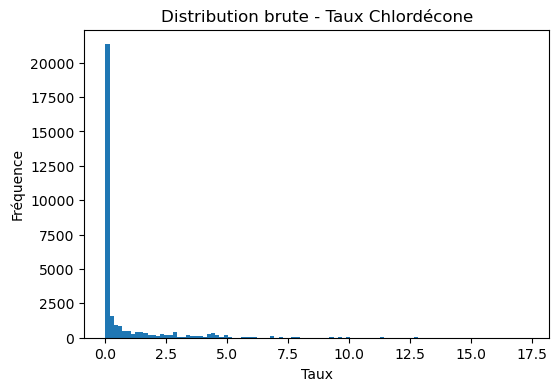

In [147]:
plt.figure(figsize=(6,4))
plt.hist(df["Taux_Chlordecone_clean"], bins=100)
plt.title("Distribution brute - Taux Chlordécone")
plt.xlabel("Taux")
plt.ylabel("Fréquence")
plt.show()

### Boxplot (visualisation des extrêmes)

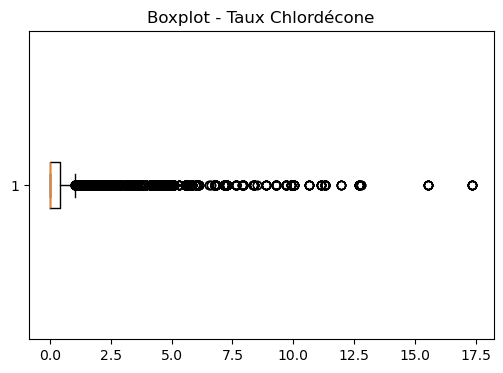

In [148]:
plt.figure(figsize=(6,4))
plt.boxplot(df["Taux_Chlordecone_clean"], vert=False)
plt.title("Boxplot - Taux Chlordécone")
plt.show()

### Histogramme log-transformé (le plus important)

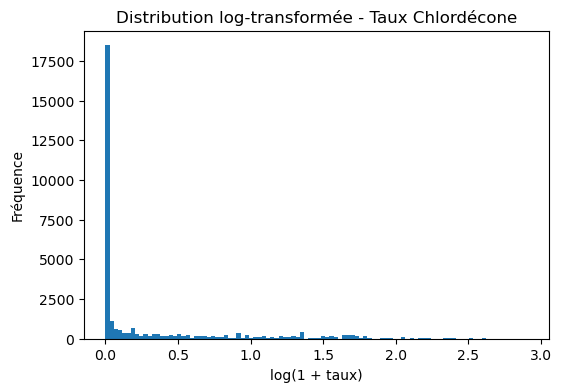

In [149]:
plt.figure(figsize=(6,4))
plt.hist(df["log_chl"], bins=100)
plt.title("Distribution log-transformée - Taux Chlordécone")
plt.xlabel("log(1 + taux)")
plt.ylabel("Fréquence")
plt.show()

L’analyse graphique des concentrations en chlordécone révèle une distribution fortement asymétrique à droite, caractérisée par une forte concentration de valeurs faibles et une longue queue associée à des concentrations élevées. Le boxplot confirme la présence de nombreuses valeurs extrêmes selon le critère IQR. Toutefois, ces valeurs sont cohérentes avec la nature environnementale des données et n’ont pas été supprimées. Une transformation logarithmique a été appliquée afin de stabiliser la variance et faciliter les analyses statistiques ultérieures.

## Export du dataset propre

In [150]:
df.to_csv("../data/processed/BaseCLD2026_clean.csv", index=False)